# Discussion 9

What goes into making a map?

* __Geometry__: Data structures to represent points, lines, and polygons, along with functions to manipulate them. Most packages are based on the open-source GEOS library.
    + shapely
* __Projections__: Functions to convert between different map projections. Most packages are based on the open-source PROJ.4 library.
    + pyproj
* __Formats__: Functions to read/write shapefiles, geojson, and other formats. Most packages are based on the open-source GDAL/OGR library.
    + pyshp
    + fiona
    + geojson
* __Display__: Functions to draw the map.
    + matplotlib
        - descartes
    + plotly
    + folium
    + bokeh
* __Searches__: Functions to search in various ways (geocode, reverse geocode, and so on).
    + geopy
    + rtree

The organization of Python's GIS packages can be confusing. Generally, you should start by choosing how you want to display the map. Some of the display packages specify which other packages they work with.

There are also some packages that provide a unified inteface on top of the other GIS packages:

* basemap
* geopandas
* cartopy

References for mapping and GIS (geographic information systems) in Python:

* Lawhead, J. _Learning Geospatial Analysis with Python_.
* basemap
    + [Basemap Documentation](http://matplotlib.org/basemap/)
    + [Basemap Tutorial](https://basemaptutorial.readthedocs.io/en/latest/)
    + [Mapping Global Earthquake Activity](http://introtopython.org/visualization_earthquakes.html)
    + [Creating Attractive and Informative Map Visualisations in Python with Basemap](http://www.datadependence.com/2016/06/creating-map-visualisations-in-python/)
* GeoPandas
    + [GeoPandas Documentation](http://geopandas.org/)
    + [Automating GIS Processes](https://automating-gis-processes.github.io/), an open course from University of Helsinki
* CartoPy
    + [CartoPy Documentation](http://scitools.org.uk/cartopy/docs/latest/)

## Setup

In [1]:
# Make Jupyter to automatically display matplotlib plots.
%matplotlib inline
# Make plots larger.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 12)

We'll use the [NOAA Significant Earthquake Database](https://www.ngdc.noaa.gov/nndc/struts/form?t=101650&s=1&d=1) in the examples below.

In [2]:
import pandas as pd
df = pd.read_table("significant_quakes.tsv")
df.columns = df.columns.str.lower()
latlon = ["latitude", "longitude"]
df[latlon] = df[latlon].apply(lambda x: pd.to_numeric(x.str.strip()))
df.head()

,i_d,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description
0,1,NaN,-2150,NaN,NaN,NaN,NaN,,NaN,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Tsu,-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,-2000,NaN,NaN,NaN,NaN,NaN,18.0,7.1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3,5877,Tsu,-1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,8,NaN,-1566,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

i_d                                     int64
flag_tsunami                           object
year                                    int64
month                                 float64
day                                   float64
hour                                  float64
minute                                float64
second                                 object
focal_depth                           float64
eq_primary                            float64
eq_mag_mw                             float64
eq_mag_ms                             float64
eq_mag_mb                             float64
eq_mag_ml                             float64
eq_mag_mfa                            float64
eq_mag_unk                            float64
intensity                             float64
country                                object
state                                  object
location_name                          object
latitude                              float64
longitude                         

## Basemap

The basemap package provides GIS functions for matplotlib.

/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


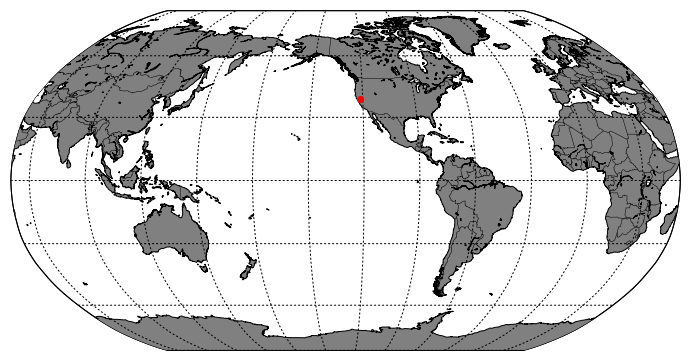

In [4]:
from mpl_toolkits.basemap import Basemap
import numpy as np

my_map = Basemap(projection='robin', lat_0=0, lon_0=-130, resolution='l', area_thresh=1000)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color="gray")
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

x, y = my_map(-121.70, 38.54) # Davis, CA
my_map.plot(x, y, "ro")
my_map

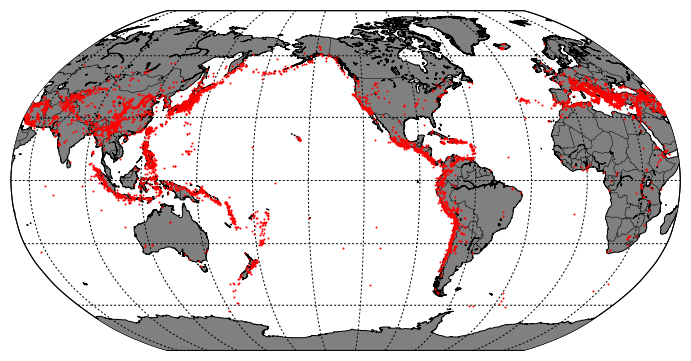

In [5]:
quake_map = Basemap(projection='robin', lat_0=0, lon_0=-130, resolution='l', area_thresh=1000)
 
quake_map.drawcoastlines()
quake_map.drawcountries()
quake_map.fillcontinents(color="gray")
quake_map.drawmapboundary()
quake_map.drawmeridians(np.arange(0, 360, 30))
quake_map.drawparallels(np.arange(-90, 90, 30))

x, y = quake_map(df.longitude.values, df.latitude.values)
quake_map.plot(x, y, "ro", markersize = 1)

In [6]:
df.eq_primary.describe()

count    4094.000000
mean        6.492599
std         1.042032
min         1.600000
25%         5.700000
50%         6.500000
75%         7.300000
max         9.500000
Name: eq_primary, dtype: float64

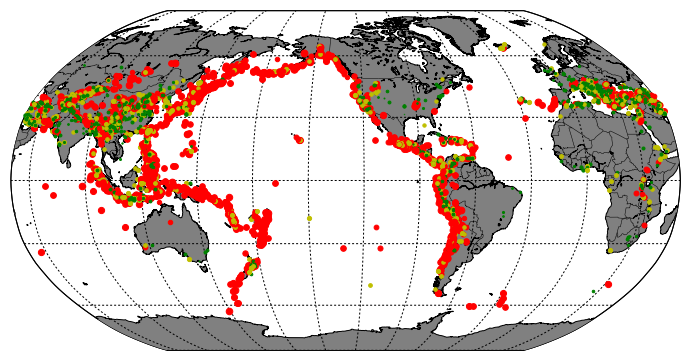

In [7]:
quake_map = Basemap(projection='robin', lat_0=0, lon_0=-130, resolution='l', area_thresh=1000)
 
quake_map.drawcoastlines()
quake_map.drawcountries()
quake_map.fillcontinents(color="gray")
quake_map.drawmapboundary()
quake_map.drawmeridians(np.arange(0, 360, 30))
quake_map.drawparallels(np.arange(-90, 90, 30))

for lon, lat, mag in zip(df.longitude, df.latitude, df.eq_primary):
    x, y = quake_map(lon, lat)
    color = "r"
    if mag <= 5.7:
        color = "g"
    elif mag <= 6.5:
        color = "y"
    quake_map.plot(x, y, color + "o", markersize = mag**2 / 10)

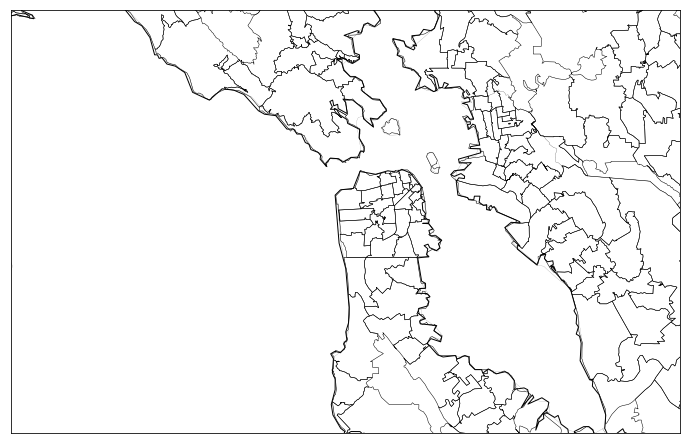

In [8]:
my_map = Basemap(llcrnrlon=-123.0, llcrnrlat=37.5, urcrnrlon=-122.0, urcrnrlat=38.0, resolution="h",
    projection="merc"
)

my_map.drawcoastlines()
my_map.drawcounties()

my_map.readshapefile("zip/cb_2015_us_zcta510_500k", "zipcodes")

my_map

## GeoPandas

The GeoPandas package provides a Pandas-like interface for working with GIS data and making maps.

In [9]:
ca_quakes = df[df.state == "CA"]
ca_quakes.shape

(100, 47)

In [10]:
ca_quakes.head()

,i_d,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description
1459,5857,Tsu,1806,3.0,25.0,8.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1492,1609,NaN,1812,12.0,8.0,15.0,NaN,NaN,NaN,6.9,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0
1493,1610,Tsu,1812,12.0,21.0,19.0,NaN,NaN,NaN,7.5,...,NaN,NaN,NaN,1.0,NaN,2.0,NaN,1.0,100.0,1.0
1653,1789,NaN,1836,6.0,10.0,15.0,30.0,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670,1808,NaN,1838,6.0,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


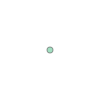

In [11]:
import shapely.geometry as geom

geom.Point(5, 10)

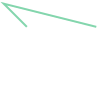

In [12]:
geom.LineString([(5, 10), (0, 15), (20, 10)])

In [13]:
import geopandas as gpd

lonlat = [geom.Point(lon, lat) for lon, lat in zip(ca_quakes.longitude, ca_quakes.latitude)]
ca_quakes.drop(["longitude", "latitude"], axis = 1)

ca_quakes = gpd.GeoDataFrame(ca_quakes, geometry = lonlat, crs = {'init' :'epsg:4326'})
ca_quakes.geometry.head()

1459      POINT (-119.7 34.4)
1492    POINT (-117.65 34.37)
1493      POINT (-119.9 34.2)
1653          POINT (-122 38)
1670      POINT (-122.4 37.6)
Name: geometry, dtype: object

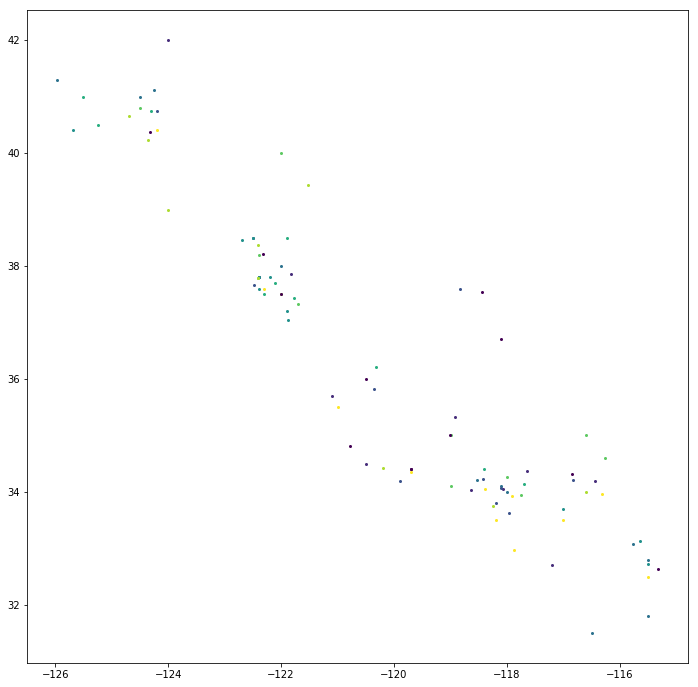

In [14]:
ca_quakes.plot()

A United States zip code shapefile is available here: <https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html>

In [15]:
zips = gpd.read_file("zip/cb_2015_us_zcta510_500k.shp")
zips.head()

,AFFGEOID10,ALAND10,AWATER10,GEOID10,ZCTA5CE10,geometry
0,8600000US36907,322847900,352811,36907,36907,"POLYGON ((-88.41800160107559 32.3381764852796,..."
1,8600000US85922,1011640213,789332,85922,85922,"POLYGON ((-109.282102 33.708941, -109.281566 3..."
2,8600000US84536,1546879191,209429,84536,84536,"POLYGON ((-110.709068 37.258372, -110.708278 3..."
3,8600000US94929,2749903,0,94929,94929,"(POLYGON ((-122.968755 38.237523, -122.965434 ..."
4,8600000US96086,664958004,1492676,96086,96086,"POLYGON ((-123.40933 41.98724199999999, -123.4..."


In [16]:
# According to Wikipedia, CA zips are 90000 - 96199
zips = zips[zips.ZCTA5CE10.str.startswith("9")]
zips = zips[pd.to_numeric(zips.ZCTA5CE10) <= 96199]

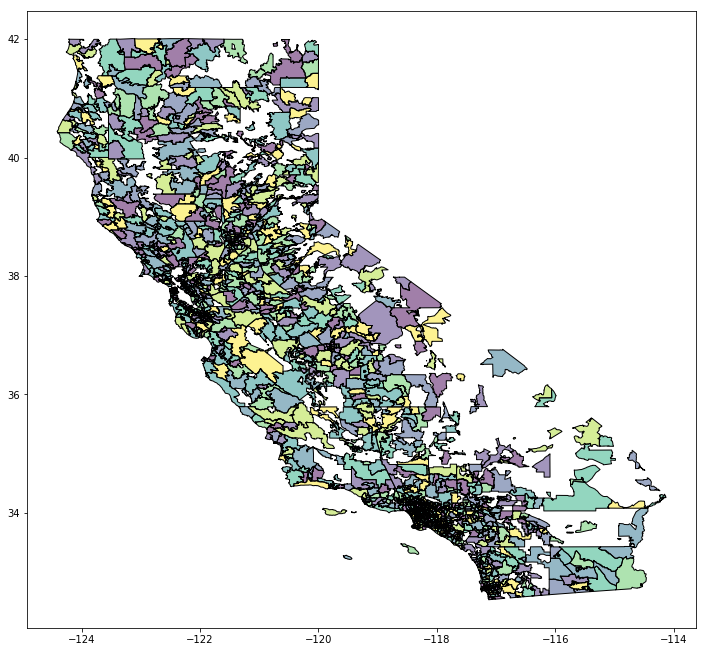

In [17]:
zips.plot()

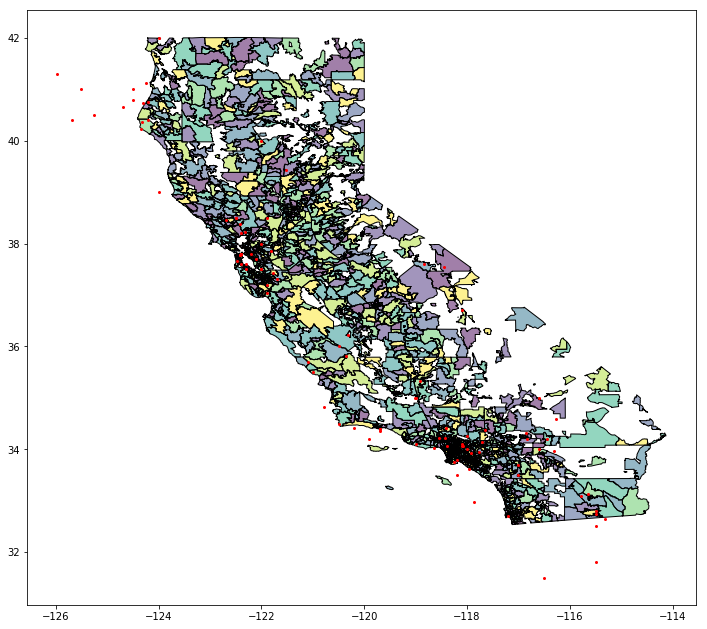

In [18]:
base = zips.plot()

ca_quakes.plot(ax = base, marker = "o", color = "red")

In [19]:
# Change the quakes projection to the same as the zips projection.
ca_quakes = ca_quakes.to_crs(zips.crs)

In [20]:
zipcode = []
for pt in ca_quakes.geometry:
    matched = zips[zips.geometry.contains(pt)]
    if matched.shape[0] == 0:
        zipcode.append(np.NaN)
    else:
        zipcode.append(matched.ZCTA5CE10.iloc[0])
        
ca_quakes["zip"] = zipcode

# GeoPandas has a .sjoin function to do this automatically, but it requires the rtree package (which you may find hard to install).

In [21]:
ca_quakes.columns

Index([u'i_d', u'flag_tsunami', u'year', u'month', u'day', u'hour', u'minute',
       u'second', u'focal_depth', u'eq_primary', u'eq_mag_mw', u'eq_mag_ms',
       u'eq_mag_mb', u'eq_mag_ml', u'eq_mag_mfa', u'eq_mag_unk', u'intensity',
       u'country', u'state', u'location_name', u'latitude', u'longitude',
       u'region_code', u'deaths', u'deaths_description', u'missing',
       u'missing_description', u'injuries', u'injuries_description',
       u'damage_millions_dollars', u'damage_description', u'houses_destroyed',
       u'houses_destroyed_description', u'houses_damaged',
       u'houses_damaged_description', u'total_deaths',
       u'total_deaths_description', u'total_missing',
       u'total_missing_description', u'total_injuries',
       u'total_injuries_description', u'total_damage_millions_dollars',
       u'total_damage_description', u'total_houses_destroyed',
       u'total_houses_destroyed_description', u'total_houses_damaged',
       u'total_houses_damaged_description', 

In [22]:
cols = ["flag_tsunami", "year", "eq_primary", "deaths", "zip"]
ca_quakes.loc[ca_quakes.year >= 1900, cols].reset_index()

,index,flag_tsunami,year,eq_primary,deaths,zip
0,2470,Tsu,1901,6.4,NaN,93451
1,2495,NaN,1902,NaN,NaN,NaN
2,2592,Tsu,1906,7.9,700.0,94015
3,2782,NaN,1915,6.2,6.0,92243
4,2845,NaN,1918,6.8,NaN,92545
5,2907,NaN,1922,7.6,NaN,NaN
6,2925,Tsu,1923,7.2,NaN,NaN
7,2982,NaN,1925,6.8,13.0,NaN
8,3014,Tsu,1927,5.8,NaN,NaN
9,3035,Tsu,1927,7.3,NaN,NaN


In [23]:
ca_quakes.groupby("zip").size().sort_values().tail(10)

zip
92305    1
92397    1
92536    1
92118    1
94560    2
94574    2
94102    2
95558    2
91770    2
94111    3
dtype: int64